# 전복 데이터 회귀 문제 ( 딥러닝 )

## import Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

## 데이터 전처리 및 스케일링

In [55]:
df = pd.read_csv("https://github.com/MyungKyuYi/AI-class/raw/main/abalone.csv", index_col=0) # id열은 분석에 사용되는 열이 아니므로 그냥 index로 사용.
print(df.head())
print("\n=====================================================\n")

# 결측치 확인
print(df.isnull().sum())
print("\n=====================================================\n")

X = df.drop(['Rings'], axis=1) # Feature
Y = df['Rings'] # 예측해야 할 컬럼

# One-Hot Encoding하면서 Numpy으로 변환
X = pd.get_dummies(X, columns=["Sex"]).values # Sex열만 문자 데이터이므로 Sex열만 인코딩.
Y = pd.get_dummies(Y).values # 회귀 문제의 예측 대상 열은 사실 숫자이면 인코딩할 필요가 없음. 연관성을 끊어줄 필요가 없기에. 문자 데이터인 경우에만 인코딩 필요.
print(X)
print(Y)

# 학습 데이터 & 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=15)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 분할된 데이터의 shape을 출력
print(X_train.shape) # (2923, 10) : 특성의 개수 10개. Sex열을 인코딩했으므로 늘어난 모습을 볼 수 있다.
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print("\n=====================================================\n")

   Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
id                                                               
0    M   0.455     0.365   0.095        0.5140          0.2245   
1    M   0.350     0.265   0.090        0.2255          0.0995   
2    F   0.530     0.420   0.135        0.6770          0.2565   
3    M   0.440     0.365   0.125        0.5160          0.2155   
4    I   0.330     0.255   0.080        0.2050          0.0895   

    Viscera_weight  Shell_weight  Rings  
id                                       
0           0.1010         0.150     15  
1           0.0485         0.070      7  
2           0.1415         0.210      9  
3           0.1140         0.155     10  
4           0.0395         0.055      7  


Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


[[0.455 0.365 0.095 ... False False True]
 [0.

# 딥러닝 학습 및 예측

In [58]:
# 딥러닝
model = Sequential()

model.add(Dense(16,input_shape=(10,),activation='relu')) # 입력층 : 특성의 개수 10개
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1)) # 회귀 문제의 출력층의 뉴런 개수는 1개 / 활성화 함수 : X / loss function은 mse

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

model.summary()

N_EPOCHS = 30
history = model.fit(X_train, Y_train, epochs=N_EPOCHS, batch_size=32, validation_split=0.1) # 학습
Y_pred = model.predict(X_test) # 예측. 실제 수치값을 예측한다.

C:\Users\plo55\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 16)                  │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1462 - mse: 0.1462 - val_loss: 0.0357 - val_mse: 0.0357
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0358 - mse: 0.0358 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0356 - mse: 0.0356 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 9/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0345 - mse: 

# 딥러닝 성능 평가

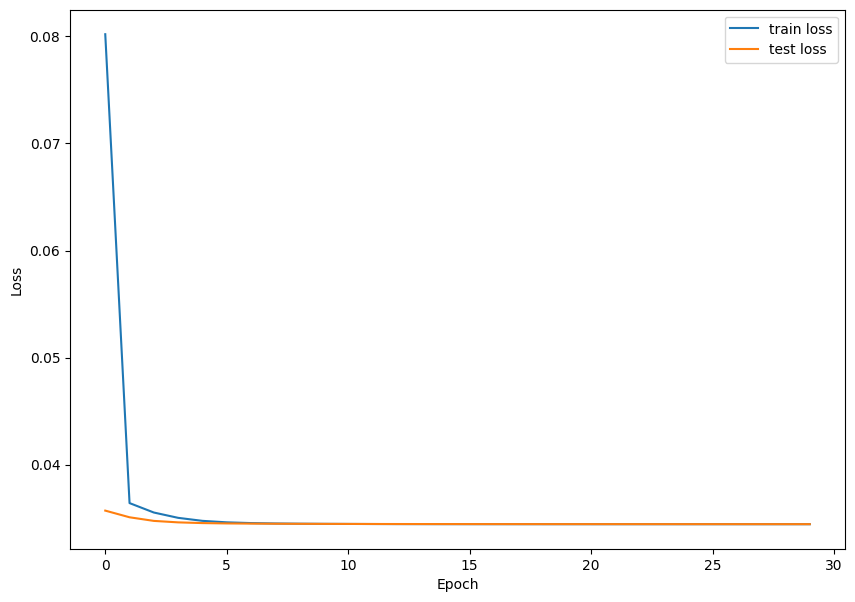



40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0344 - mse: 0.0344 


[0.03443959355354309, 0.03443959355354309]

In [61]:
# 모델이 학습되는 동안의 손실(loss) 변화 과정을 시각화
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss') # .history['loss'] : 훈련 데이터에 대한 loss (epoch마다 측정됨)
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss') # .history['val_loss'] : 검증 데이터(validation_split로 나눈) loss
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 모델 성능 평가
print("\n=====================================================\n")
model.evaluate(X_test, Y_test) # loss와 metrics으로 mse 값 출력